## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [2]:
# Reading data from remote link
url = 'http://bit.ly/w-data'
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
if (~s_data.empty):
    print("There is no null entry")

There is no null entry


In [4]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<b>We can see that average hour student studies for 5 hour and scores 51.And a student studies for maximum of 9 hours and scores 95.</b> 

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

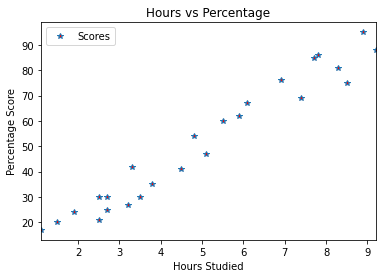

In [5]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='*',markerfacecolor='red')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

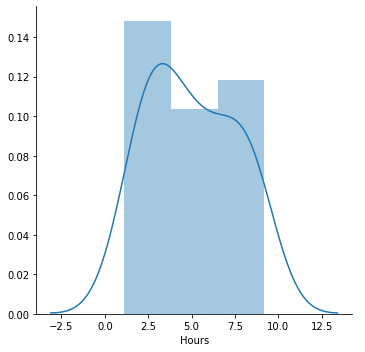

In [6]:
sns.FacetGrid(s_data,height=5) \
   .map(sns.distplot, "Hours") \
   .add_legend();
plt.show();

<b>Here we can see that most of the student read around 2.5 to 4.0 hours.</b>

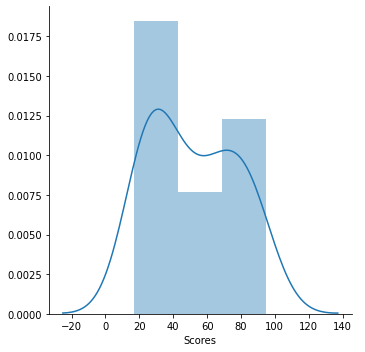

In [7]:
sns.FacetGrid(s_data,height=5) \
   .map(sns.distplot, "Scores") \
   .add_legend();
plt.show();

<b>Here we can see that most of the student get scores of 20 to 40% as most of them studied for less hours</b>

Bin=5 Created in order of [17.  32.6 48.2 63.8 79.4 95. ]


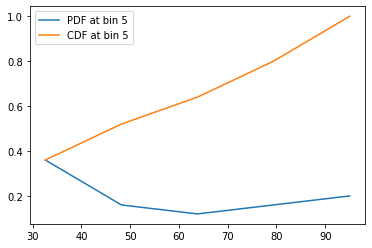

In [8]:
counts, bin_edges = np.histogram(s_data['Scores'], bins=5, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
print("Bin=5 Created in order of",bin_edges);


cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF at bin 5');
plt.plot(bin_edges[1:], cdf,label='CDF at bin 5')

plt.legend()
plt.show();


<b>If we observe the pdf and cdf of Scores, we can find out that most of the student studies for less hour.</b>

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [9]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [16]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [17]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


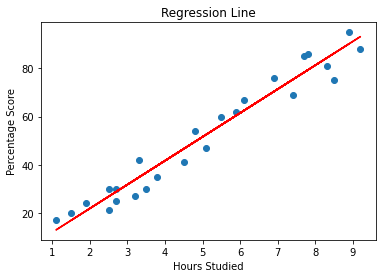

In [18]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.title('Regression Line')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [19]:
y_pred=regressor.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [20]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
